In [1]:
! pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 12, 20)

print(start)
print(end)

2018-01-01 00:00:00
2024-12-20 00:00:00


In [3]:
stock = ['TSLA']
data = pdr.DataReader(stock, 'stooq', str(start.date()), str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-24,TSLA,215.99,225.9900,214.71,225.42,167942939
2024-07-23,TSLA,246.38,255.7594,245.63,253.60,111928192
2024-07-22,TSLA,251.51,253.2100,243.75,244.21,101225430
2024-07-19,TSLA,239.20,249.4400,236.83,247.79,87403903
2024-07-18,TSLA,249.23,257.1400,247.20,251.09,110869037


In [4]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-24,TSLA,215.99,225.9900,214.71,225.42,167942939
1,2024-07-23,TSLA,246.38,255.7594,245.63,253.60,111928192
2,2024-07-22,TSLA,251.51,253.2100,243.75,244.21,101225430
3,2024-07-19,TSLA,239.20,249.4400,236.83,247.79,87403903
4,2024-07-18,TSLA,249.23,257.1400,247.20,251.09,110869037


In [5]:
newData.to_csv('Tesla_stock_2018_to_2024.csv')

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date', ylabel='Close Price'>

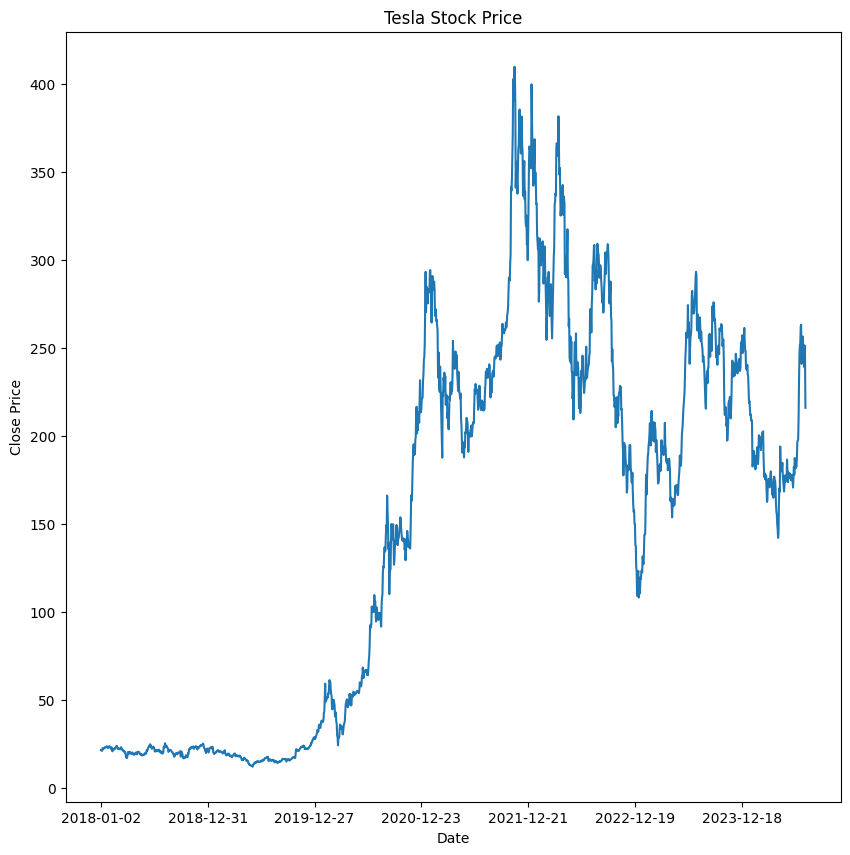

In [6]:
import matplotlib.pyplot as plt
# Plot the close price of the Tesla Stock
# Load the CSV file
Tsla_data = pd.read_csv('Tesla_stock_2018_to_2024.csv')
Tsla_data.head()
# Set the date in the Index
Tsla_data.set_index('Date', inplace=True)
#Sort data in Ascending Order
Tsla_data.sort_index(inplace=True)
Tsla_data.head()
# And then seperate the close price
close_price = Tsla_data['Close']
close_price.head()
# Then plot the close price
close_price.plot(xlabel='Date', ylabel='Close Price',label='TSLA', title='Tesla Stock Price', figsize=(10, 10))

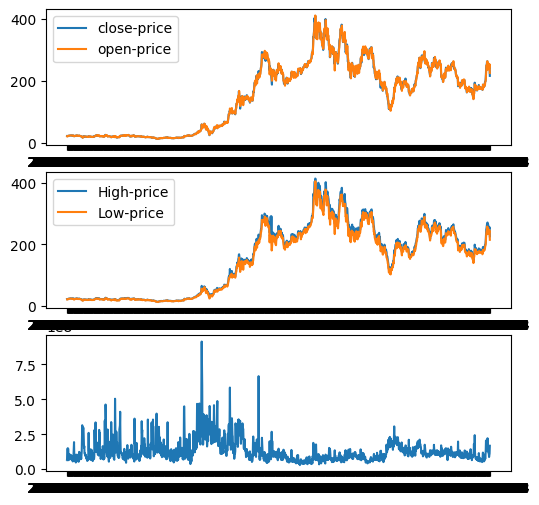

In [7]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(Tsla_data['Close'],label='close-price')
plt.plot(Tsla_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Tsla_data['High'],label='High-price')
plt.plot(Tsla_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(Tsla_data['Volume'],label='Volumne')

In [8]:
# moving average

Tsla_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1649,TSLA,21.3687,21.4740,20.7333,20.8000,65188275
2018-01-03,1648,TSLA,21.1500,21.6833,21.0367,21.4000,66893295
2018-01-04,1647,TSLA,20.9747,21.2367,20.3787,20.8580,149194260
2018-01-05,1646,TSLA,21.1053,21.1493,20.8000,21.1080,68838660
2018-01-08,1645,TSLA,22.4273,22.4680,21.0333,21.0667,147555480


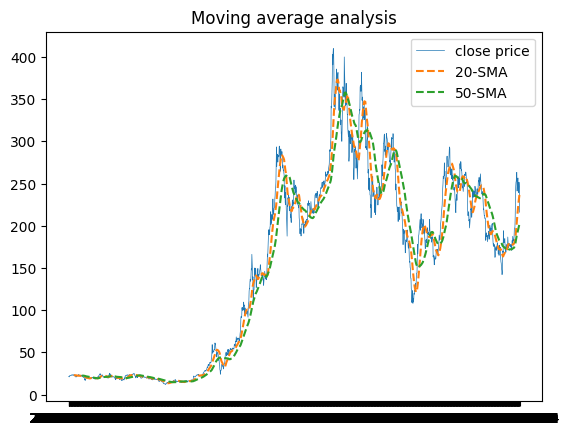

In [9]:
# calulate the moving average
Tsla_data['SMA_20'] = Tsla_data['Close'].rolling(20).mean()
Tsla_data['SMA_50'] = Tsla_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(Tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

In [10]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=879f1a9697fedf0c78ecdabe2f8dab31f0a618b42f73d174956c2a7e6b855649
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


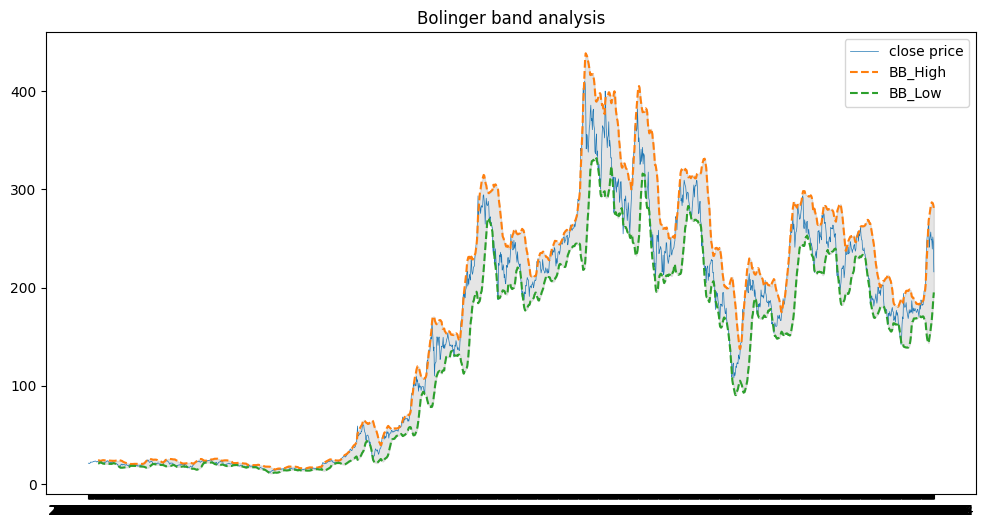

In [11]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(Tsla_data['Close'],window=20,window_dev=2)

Tsla_data['BB_High']=bb.bollinger_hband()
Tsla_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(Tsla_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(Tsla_data.index,Tsla_data['BB_High'],
                 Tsla_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-18,4,TSLA,249.23,257.1400,247.20,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,3,TSLA,239.20,249.4400,236.83,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507
2024-07-22,2,TSLA,251.51,253.2100,243.75,244.21,101225430,233.3030,199.7452,285.879839,180.726161,63.959897
2024-07-23,1,TSLA,246.38,255.7594,245.63,253.60,111928192,236.4930,201.2334,283.856031,189.129969,60.477672
2024-07-24,0,TSLA,215.99,225.9900,214.71,225.42,167942939,237.9250,202.1838,280.774993,195.075007,44.886925


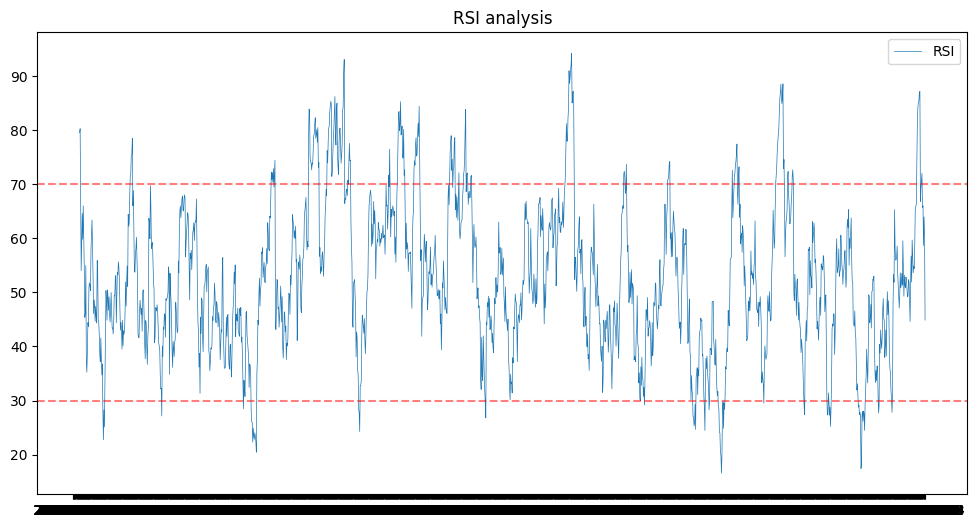

In [12]:
# relative strength index
Tsla_data['RSI'] = ta.momentum.rsi(Tsla_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(Tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
Tsla_data.tail()